In [71]:
pip install rasterio matplotlib

Note: you may need to restart the kernel to use updated packages.


In [73]:
import rasterio as rio

In [79]:
# GitHub raw link
url = "https://raw.githubusercontent.com/kisalchandula/Forest-monitoring-ML/main/Data/2017_sample.tiff"

# Use /vsicurl/ to read remote data
vsicurl_url = f"/vsicurl/{url}"

with rasterio.open(vsicurl_url) as src:
    image = src.read()
    profile = src.profile

print("Image shape:", image.shape)
print("Metadata:", profile)

Image shape: (3, 944, 942)
Metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 942, 'height': 944, 'count': 3, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.0001457432059447997, 0.0, 8.1888563,
       0.0, -9.621705508474387e-05, 48.7721766), 'blockxsize': 942, 'blockysize': 8, 'tiled': False, 'compress': 'deflate', 'interleave': 'pixel'}


In [89]:
from typing import Any, Optional, Tuple
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import requests
import tempfile

def plot_image(
    image: np.ndarray, factor: float = 1.0, clip_range: Optional[Tuple[float, float]] = None, **kwargs: Any
) -> None:
    """Utility function for plotting RGB images."""
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
    if clip_range is not None:
        ax.imshow(np.clip(image * factor, *clip_range), **kwargs)
    else:
        ax.imshow(image * factor, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])

# Download the TIFF file from GitHub
url = "https://raw.githubusercontent.com/kisalchandula/Forest-monitoring-ML/main/Data/2017_sample.tiff"
response = requests.get(url)

In [97]:
from PIL import Image
from io import BytesIO

image = Image.open(BytesIO(response.content))
image_np = np.asarray(image)

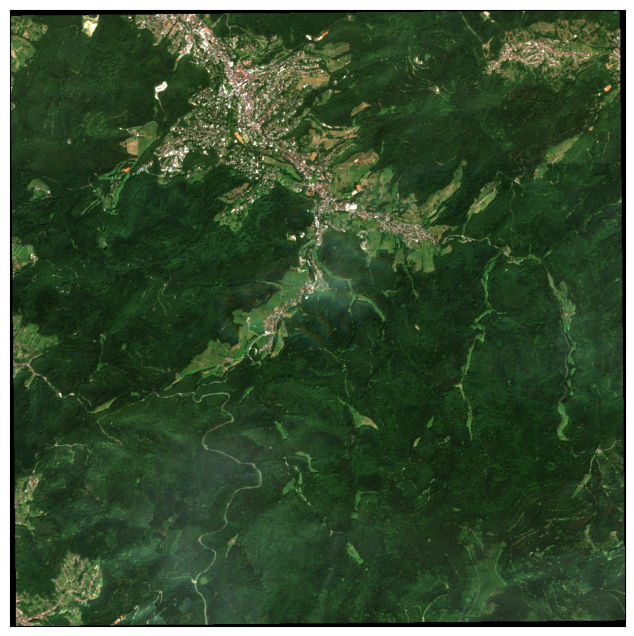

In [99]:
plot_image(image_np, 2.5/255, (0, 1))

In [ ]:
# Step 3: Plot feature space
# Reshape to (num_pixels, num_bands)
bands = image.shape[0]
pixels = image.reshape(bands, -1).T  # (n_pixels, n_bands)

if bands >= 3:
    # 3D Scatter Plot for 3 bands
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pixels[:, 0], pixels[:, 1], pixels[:, 2], c=pixels[:, :3]/255.0, s=0.1)
    ax.set_xlabel('Band 1')
    ax.set_ylabel('Band 2')
    ax.set_zlabel('Band 3')
    ax.set_title('Feature Space (3D)')
    plt.show()
elif bands == 2:
    # 2D Scatter Plot for 2 bands
    plt.figure(figsize=(10, 8))
    plt.scatter(pixels[:, 0], pixels[:, 1], c='blue', s=0.1)
    plt.xlabel('Band 1')
    plt.ylabel('Band 2')
    plt.title('Feature Space (2D)')
    plt.show()
else:
    print("Not enough bands to plot feature space.")